In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import model_selection

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Dataset
The inspiration from this project stems from this dataset found on Kaggle (https://www.kaggle.com/prasoonkottarathil/polycystic-ovary-syndrome-pcos). The goal is to create a Logistic Regression model from scratch that can diagnose PCOS. This will involve feature engineering to identify the most valuable features for our prediction and showcasing our process. 

In [152]:
infertility_data = pd.read_csv("PCOS_infertility.csv")
non_infertility_data = pd.read_csv("PCOS_data_without_infertility.csv")

#Convert all values to floats
infertility_data.drop(infertility_data[infertility_data['AMH(ng/mL)'] == 'a'].index, inplace=True)
infertility_data['AMH(ng/mL)'] = infertility_data['AMH(ng/mL)'].astype(float)
infertility_data.dropna()

non_infertility_data.drop(infertility_data[infertility_data['AMH(ng/mL)'] == 'a'].index, inplace=True)
non_infertility_data['AMH(ng/mL)'] = infertility_data['AMH(ng/mL)'].astype(float)


non_infertility_data.shape #(rows,cols)

# Marriage Status, Fast Food, AMH contains a null value, remove all null rows
non_infertility_data = non_infertility_data.dropna()
# np.isnan(non_infertility_data).any() # prints all nulls

In [153]:
non_infertility_data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,15,78,22,10.48,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,15,74,20,11.70,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,11,72,18,11.80,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,13,72,20,12.00,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,11,72,18,10.00,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [154]:
# Available Features
features = non_infertility_data.columns
features = features.drop('PCOS (Y/N)')
features = features.drop('Sl. No')
features = features.drop("Patient File No.")

# Label
label = 'PCOS (Y/N)'

X = non_infertility_data[features]
y = non_infertility_data[["PCOS (Y/N)"]].to_numpy()
non_infertility_data = non_infertility_data.astype(float)

### How many patients in our dataset have PCOS?
67.3% of our dataset doesn't have PCOS. 32.7% has PCOS. So if we were to create a model, we would expect that about 67% of the time our patient will not PCOS. So 67% accuracy is not going to be very high considering our current dataset. 

In [191]:
no, yes = non_infertility_data['PCOS (Y/N)'].value_counts()
print("PCOS:", yes, "Percentage: %.2f%%" % ((yes/(no+yes)) * 100))
print("No PCOS:", no, "Percentage: %.2f%%" % ((no/(no+yes)) * 100))

PCOS: 176 Percentage: 32.71%
No PCOS: 362 Percentage: 67.29%


# Construct Logistic Regression Functions
In this project, we aren't going to utilize Sci-kit Learn pre-built functions and instead opt to create these functions ourself. This will include a Sigmoid and Predict function among others in order to achieve the same functionality found in the advanced Sci-kit learn library. 

In [155]:
class LogRegression:
    def __init__(self, learn_rate=0.001, num_iters=1000):
        self.learn_rate = learn_rate
        self.num_iters = num_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # Initializations
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient Descent
        for i in range(self.num_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            dw = (1 / num_samples) * np.dot(X.T, y_predicted.T)
            db = (1 / num_samples) * np.sum(y_predicted - y)
            
            self.weights = self.weights - (self.learn_rate * dw.T)
            self.bias = self.bias - (self.learn_rate * db)
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

# Initial Evaluation
I will split our dataset into 80% training and 20% testing. The training set will contain exactly 432 patients while the testing set will contain 108 patients. 

In [156]:
# Train Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [157]:
''' Used to evaluate accuracy for two np.arrays '''
def accuracy(actual, expected):
    accuracy = np.sum(actual == expected)/len(expected)
    return accuracy

In [158]:
# Will all features being utilized
Regression = LogRegression(.0001, 1000)
Regression.fit(X_train, y_train)
y_pred = Regression.predict(X_test)

results = accuracy(y_pred, y_test)
results

69.0

# Learning Rate Evaluation
First, before we move into Sci-kit Learn, I want to test the original model with various learning rates to see if there is a correlation with greater accuracy. Unfortunately, with this current model using only one accuracy method, the results vary tremendously without any sort of rhyme or reason. I believe my current model gets stuck on a local minima that might not be the global minima. With this, this may be leading to our results being less accurate than the Sci-kit Learn logistic regression utilized below. 

In [173]:
initial_rate = 0.0001
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    
    Regression = LogRegression(initial_rate + (i * 0.005), 1000)
    Regression.fit(X_train, y_train)
    y_pred = Regression.predict(X_test)

    results = accuracy(y_pred, y_test)
    print("Accuracy: %.2f%%" % results, "Learning Rate:",initial_rate + (i * 0.005))

Accuracy: 73.00% Learning Rate: 0.0001
Accuracy: 76.57% Learning Rate: 0.0051
Accuracy: 71.33% Learning Rate: 0.0101
Accuracy: 60.87% Learning Rate: 0.015099999999999999
Accuracy: 66.04% Learning Rate: 0.0201
Accuracy: 76.67% Learning Rate: 0.0251
Accuracy: 73.00% Learning Rate: 0.0301
Accuracy: 72.00% Learning Rate: 0.035100000000000006
Accuracy: 66.52% Learning Rate: 0.040100000000000004
Accuracy: 69.70% Learning Rate: 0.0451
Accuracy: 76.15% Learning Rate: 0.050100000000000006
Accuracy: 67.89% Learning Rate: 0.0551
Accuracy: 79.04% Learning Rate: 0.0601
Accuracy: 63.00% Learning Rate: 0.0651
Accuracy: 75.59% Learning Rate: 0.07010000000000001
Accuracy: 59.78% Learning Rate: 0.0751
Accuracy: 71.33% Learning Rate: 0.0801
Accuracy: 69.74% Learning Rate: 0.08510000000000001
Accuracy: 79.00% Learning Rate: 0.0901
Accuracy: 70.69% Learning Rate: 0.0951


# Iterations Evaluation
With iterations, we will evaluate whether iterating from 100 to 2000 iterations shows any sort of consistent improvement within the accuracy of our original model. With the learning rate, it didn't seem to make any sort of consistent change which I think is a strong correlation with the model getting stuck on a local minima.

In [175]:
initial_rate = 0.001
iterations = 100
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    
    Regression = LogRegression(initial_rate, iterations+(i+100))
    Regression.fit(X_train, y_train)
    y_pred = Regression.predict(X_test)

    results = accuracy(y_pred, y_test)
    print("Accuracy: %.2f%%" % results, "Iterations:",iterations+(i*100))

Accuracy: 73.00% Iterations: 100
Accuracy: 78.00% Iterations: 200
Accuracy: 71.00% Iterations: 300
Accuracy: 78.07% Iterations: 400
Accuracy: 74.00% Iterations: 500
Accuracy: 79.00% Iterations: 600
Accuracy: 81.48% Iterations: 700
Accuracy: 71.67% Iterations: 800
Accuracy: 78.00% Iterations: 900
Accuracy: 66.76% Iterations: 1000
Accuracy: 78.54% Iterations: 1100
Accuracy: 77.00% Iterations: 1200
Accuracy: 70.69% Iterations: 1300
Accuracy: 82.46% Iterations: 1400
Accuracy: 70.00% Iterations: 1500
Accuracy: 75.00% Iterations: 1600
Accuracy: 79.04% Iterations: 1700
Accuracy: 67.00% Iterations: 1800
Accuracy: 71.00% Iterations: 1900
Accuracy: 69.70% Iterations: 2000


### Implement current model with only the top 20 features (out of 40)

In [177]:
new_infertility_data = non_infertility_data
# Select all features equal or greater than 0.1
X = new_infertility_data[["Follicle No. (R)","Follicle No. (L)","Skin darkening (Y/N)","hair growth(Y/N)","Weight gain(Y/N)","Cycle(R/I)","Fast food (Y/N)","Pimples(Y/N)","AMH(ng/mL)","Weight (Kg)","Hair loss(Y/N)","Waist(inch)","Hip(inch)","Avg. F size (L) (mm)","Endometrium (mm)","Avg. F size (R) (mm)","Pulse rate(bpm)"]]
y = new_infertility_data[["PCOS (Y/N)"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Regression = LogRegression(.0001, 1000)
Regression.fit(X_train, y_train)
y_pred = Regression.predict(X_test)

results = accuracy(y_pred, y_test)
results

75.5925925925926

# Implement Sci-kit Learn Model

In [159]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

X = non_infertility_data[features]
y = non_infertility_data[["PCOS (Y/N)"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [160]:
# Regular Accuracy Score
from sklearn import metrics
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

# K-Folding Score
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("K-Fold Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 87.04%
K-Fold Accuracy: 87.72%


With the previous example, I utilized all the top features. Let's try using only the top 20 features and test whether this increases or decreases the projected accuracy of our model. 

In [161]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

new_infertility_data = non_infertility_data
# Select all features equal or greater than 0.1
X = new_infertility_data[["Follicle No. (R)","Follicle No. (L)","Skin darkening (Y/N)","hair growth(Y/N)","Weight gain(Y/N)","Cycle(R/I)","Fast food (Y/N)","Pimples(Y/N)","AMH(ng/mL)","Weight (Kg)","Hair loss(Y/N)","Waist(inch)","Hip(inch)","Avg. F size (L) (mm)","Endometrium (mm)","Avg. F size (R) (mm)","Pulse rate(bpm)"]]
y = new_infertility_data[["PCOS (Y/N)"]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [162]:
# Regular Accuracy Score
from sklearn import metrics
print("Accuracy: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

# K-Folding Score
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("K-Fold Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 90.74%
K-Fold Accuracy: 90.13%


# Correlation
Based on this initial information, a patient's AMH (ng/mL) has by far the most influence on the result of PCOS in comparison to the other two data points. The impact of II beta-HCG has the lowest influence it would appear. The first step will be eliminating II beta-HCG and see if that makes a positive change with our current learning rate and iterations before making those alterations. 

Text(0.5, 0, 'Importance')

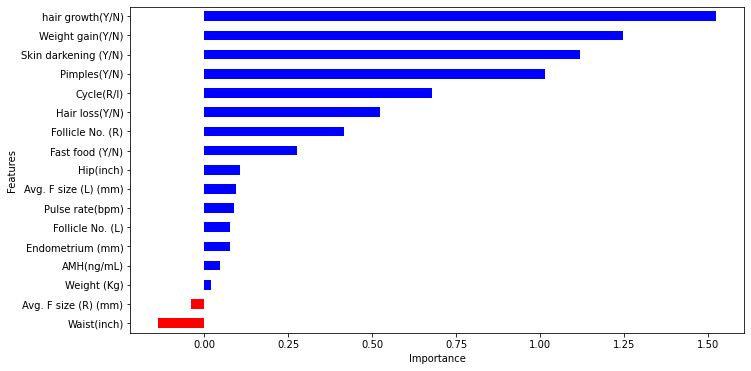

In [163]:
# Importance Plot
coeff = list(logreg.coef_[0])

labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace = True)

features['positive'] = features['importance'] > 0
features.set_index('Features', inplace = True)

features.importance.plot(kind='barh', figsize=(11,6), color= features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Above, we found that Skin Darkening, Hair Growth, Weight Gain, Pimples, Cycle, Follicle Number, Hair Loss seem to be the highest features of importance in terms of determining PC0S. In the future, we are going to start to testing whether reducing the number of features will help our model make better predictions. First, we will evaluate correlations using a correlation matrix as well. 

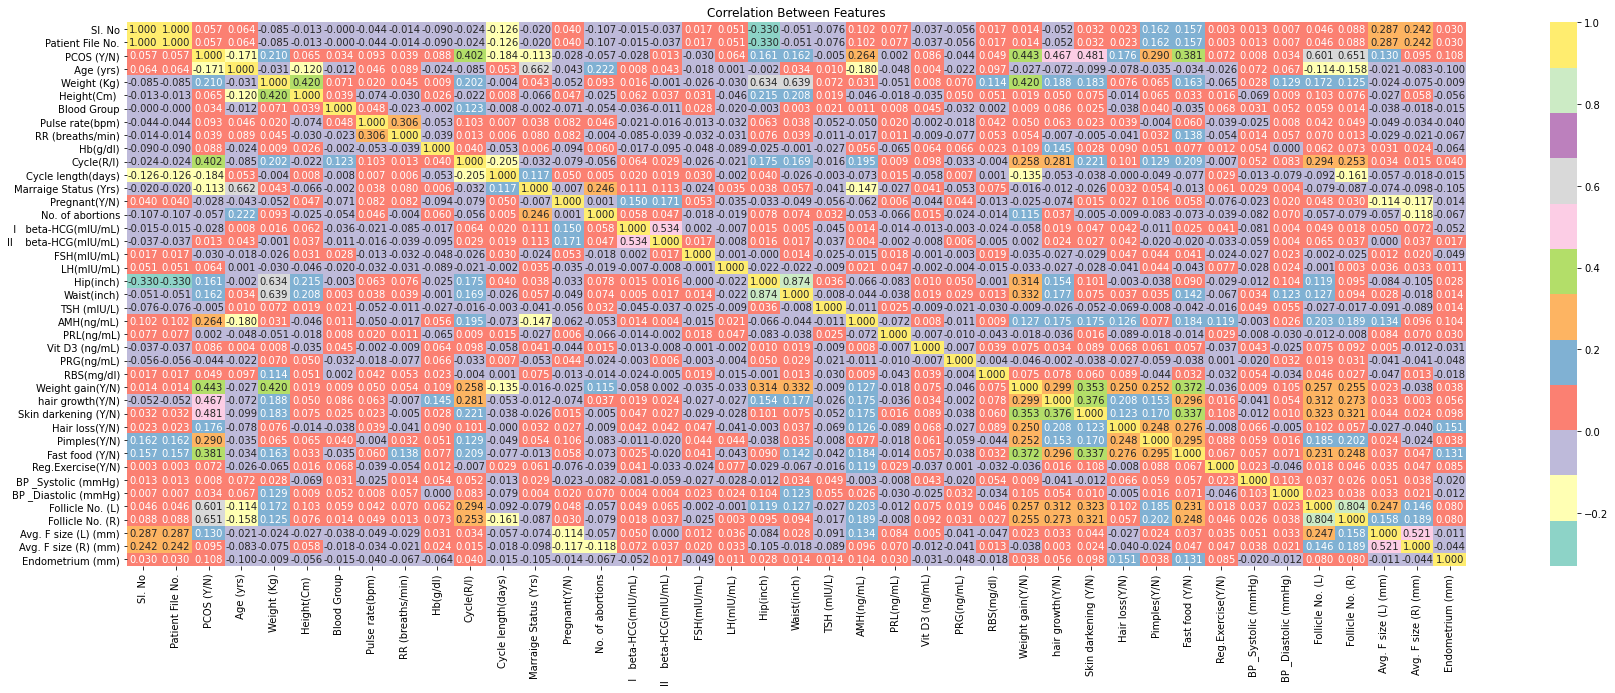

In [164]:
data = non_infertility_data
corr_matrix = data.corr()
plt.subplots(figsize=(30,10))
sns.heatmap(corr_matrix,cmap="Set3", annot = True, fmt = ".3f");
plt.title("Correlation Between Features")
plt.show()

In [165]:
# Top 20 Features by Correlation
# (Ignoring top correlation which is comparing the ID to itself)
data.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(20)

Sl. No                  Sl. No                    1.000000
Waist(inch)             Hip(inch)                 0.873879
Follicle No. (R)        Follicle No. (L)          0.803578
 Age (yrs)              Marraige Status (Yrs)     0.662009
PCOS (Y/N)              Follicle No. (R)          0.650929
Weight (Kg)             Waist(inch)               0.639108
                        Hip(inch)                 0.633848
PCOS (Y/N)              Follicle No. (L)          0.601208
II    beta-HCG(mIU/mL)    I   beta-HCG(mIU/mL)    0.533663
Avg. F size (R) (mm)    Avg. F size (L) (mm)      0.521071
PCOS (Y/N)              Skin darkening (Y/N)      0.481323
                        hair growth(Y/N)          0.466508
Weight gain(Y/N)        PCOS (Y/N)                0.443093
Weight (Kg)             Weight gain(Y/N)          0.419859
Height(Cm)              Weight (Kg)               0.419808
PCOS (Y/N)              Cycle(R/I)                0.401837
                        Fast food (Y/N)           0.3809

# Conclusion

With our second model using Sci-kit Learn, we were able to create a Logistic Regression model to predict Polycystic Ovary Syndrome (PCOS) with 90.13% accuracy using K-Folds. The features with the greatest correlation to our prediction was Skin Darkening, Weight Gain, Hair Growth, Pimples and Hair Loss although we extended beyond to about 20 features. 

I think this model was a lot of fun and something I want to improve upon in the future. I'm disappointed that my initial Logistic Regression class wasn't able to produce consistent results above 70%. Based on the iterations and learning rate, it often deviated between about 65% and 80% accuracy with our testing data. With this, it is a better than a coin flip, however, if you remember, our dataset is about 67% Non-PCOS. Therefore, our Logistic Regression model wasn't really successful. Because you could randomly guess a patient has PCOS a third of the time and likely come up with similar results. 

However, with the Sci-kit model, we were able to increase our accuracy by nearly 2% with some feature engineering and eliminates features that didn't have a strong enough correlation to our label. 